In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Load the Dataset

In [4]:
data = pd.read_csv('epilepsy_federated_dataset.csv')
df = data.copy()
pd.set_option('display.max_columns', None)
df.head()

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,87,0,1,18,0,2
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,1,0,0,2,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,53,1,1,7,0,1
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,18,0,0,18,0,2
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,12,1,1,3,1,1


In [5]:
print(f' Number of rows : {df.shape[0]}\n Number of columns : {df.shape[1]}')

 Number of rows : 289010
 Number of columns : 52


### Basic Info and Summary Stats

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289010 entries, 0 to 289009
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Mean_EEG_Amplitude                  289010 non-null  float64
 1   EEG_Std_Dev                         289010 non-null  float64
 2   EEG_Skewness                        289010 non-null  float64
 3   EEG_Kurtosis                        289010 non-null  float64
 4   Zero_Crossing_Rate                  289010 non-null  float64
 5   Root_Mean_Square                    289010 non-null  float64
 6   Peak_to_Peak_Amplitude              289010 non-null  float64
 7   Signal_Energy                       289010 non-null  float64
 8   Variance_of_EEG_Signals             289010 non-null  float64
 9   Interquartile_Range                 289010 non-null  float64
 10  Auto_Correlation_of_EEG_Signals     289010 non-null  float64
 11  Cross_Correlation_Between_

* Out of 52 columns 5 columns are categorical and are scaled.
* These columns should be decoded to make them as object or categorical

In [11]:
df.isnull().sum()

Mean_EEG_Amplitude                    0
EEG_Std_Dev                           0
EEG_Skewness                          0
EEG_Kurtosis                          0
Zero_Crossing_Rate                    0
Root_Mean_Square                      0
Peak_to_Peak_Amplitude                0
Signal_Energy                         0
Variance_of_EEG_Signals               0
Interquartile_Range                   0
Auto_Correlation_of_EEG_Signals       0
Cross_Correlation_Between_Channels    0
Hjorth_Mobility                       0
Hjorth_Complexity                     0
Line_Length_Feature                   0
Delta_Band_Power                      0
Theta_Band_Power                      0
Alpha_Band_Power                      0
Beta_Band_Power                       0
Gamma_Band_Power                      0
Low_to_High_Frequency_Power_Ratio     0
Power_Spectral_Density                0
Spectral_Edge_Frequency               0
Spectral_Entropy                      0
Fourier_Transform_Features            0


* There are no null values

In [14]:
df[df.duplicated()]

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label


* There are no duplicates

###### Check for anomalies

In [18]:
col = df.columns.to_list()
for i in col:
    print(i)
    print(df[i].unique())
    print('********')

Mean_EEG_Amplitude
[0.46399465 0.32463245 0.4994967  ... 0.26625209 0.51259855 0.13998919]
********
EEG_Std_Dev
[1.56009486 0.95323272 0.41918182 ... 1.25751853 0.98376649 0.55817305]
********
EEG_Skewness
[-1.95375185 -0.0345274  -0.69750989 ... -1.21069051 -0.01322426
 -0.05116391]
********
EEG_Kurtosis
[1.41781628 1.33384247 7.34567009 ... 8.61873084 6.46828373 0.95701621]
********
Zero_Crossing_Rate
[53.42810202 61.48603736 33.56969648 ... 82.78891042  8.17688526
 66.4107151 ]
********
Root_Mean_Square
[2.55207767 1.96871521 2.22611219 ... 2.05163962 0.93587041 2.26940117]
********
Peak_to_Peak_Amplitude
[3.73492282 1.28585677 1.86905238 ... 0.81904334 4.60521723 5.19501075]
********
Signal_Energy
[17.27601787  8.09914435  7.21144489 ... 13.81404324 18.54030468
 15.33039211]
********
Variance_of_EEG_Signals
[4.62732336 3.57213198 4.02281352 ... 9.07439234 4.70277332 2.87329262]
********
Interquartile_Range
[2.05443758 0.5411163  0.93982593 ... 0.59036397 0.50615003 1.75090371]
****

* Could not confirm anomalies.
* Should split numerical data and categorical data and perform descriptive statistics 

###### Split numerical and categorical variables

In [16]:
from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler

###### Decoding the categoric columns

In [18]:
# # Convert encoded Gender to categorical
# df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'}).astype('category')

# # Convert encoded Medication_Status to categorical
# df['Medication_Status'] = df['Medication_Status'].replace({0: 'No Medication', 1: 'On Medication'}).astype('category')

# # Convert Seizure_History to categorical
# # df['Seizure_History'] = df['Seizure_History'].replace({0: 'No History', 1: 'Has History'}).astype('category')
# df['Seizure_History'] = df['Seizure_History'].apply(lambda x: "has history" if x != 0 else "no history")

# # Convert Multi-Class Seizure Phase Classification to categorical
# df['Multi_Class_Label'] = df['Multi_Class_Label'].replace({
#     0: "Normal (Non-Seizure)", 
#     1: "Pre-Seizure (Pre-Ictal Phase)", 
#     2: "Seizure (Ictal Phase)", 
#     3: "Post-Seizure (Post-Ictal Phase)"
# }).astype('category')

# # Convert Seizure Type Classification to categorical
# df['Seizure_Type_Label'] = df['Seizure_Type_Label'].replace({
#     0: "Normal", 
#     1: "Generalized Seizure", 
#     2: "Focal Seizure"
# }).astype('category')

In [19]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['Mean_EEG_Amplitude',
 'EEG_Std_Dev',
 'EEG_Skewness',
 'EEG_Kurtosis',
 'Zero_Crossing_Rate',
 'Root_Mean_Square',
 'Peak_to_Peak_Amplitude',
 'Signal_Energy',
 'Variance_of_EEG_Signals',
 'Interquartile_Range',
 'Auto_Correlation_of_EEG_Signals',
 'Cross_Correlation_Between_Channels',
 'Hjorth_Mobility',
 'Hjorth_Complexity',
 'Line_Length_Feature',
 'Delta_Band_Power',
 'Theta_Band_Power',
 'Alpha_Band_Power',
 'Beta_Band_Power',
 'Gamma_Band_Power',
 'Low_to_High_Frequency_Power_Ratio',
 'Power_Spectral_Density',
 'Spectral_Edge_Frequency',
 'Spectral_Entropy',
 'Fourier_Transform_Features',
 'Wavelet_Entropy',
 'Wavelet_Energy',
 'Discrete_Wavelet_Transform',
 'Continuous_Wavelet_Transform',
 'Wavelet_Based_Shannon_Entropy',
 'Sample_Entropy',
 'Approximate_Entropy',
 'Shannon_Entropy',
 'Permutation_Entropy',
 'Lyapunov_Exponent',
 'Hurst_Exponent',
 'Detrended_Fluctuation_Analysis',
 'Higuchi_Fractal_Dimension',
 'Katz_Fractal_Dimension',
 'Lempel_Ziv_Complexity',
 'Seizure_Dur

In [20]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

['Gender',
 'Medication_Status',
 'Seizure_History',
 'Multi_Class_Label',
 'Seizure_Type_Label']

In [21]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Mean_EEG_Amplitude,289010.0,0.375902,0.209186,2.741494e-07,0.220723,0.353682,0.506030,1.678600e+00
EEG_Std_Dev,289010.0,1.402758,0.810342,1.520767e-08,0.797189,1.312422,1.905273,6.134043e+00
EEG_Skewness,289010.0,-0.614960,0.661663,-7.241982e+00,-0.882029,-0.396684,-0.129336,-2.051856e-09
EEG_Kurtosis,289010.0,6.205832,4.979964,2.455244e-08,2.218810,5.206509,9.060643,4.278456e+01
Zero_Crossing_Rate,289010.0,60.521465,28.807006,2.023155e-05,39.645731,58.001585,78.715237,2.234801e+02
Root_Mean_Square,289010.0,1.864850,0.550108,6.977251e-02,1.477960,1.837174,2.218587,5.062378e+00
Peak_to_Peak_Amplitude,289010.0,3.008423,1.675024,2.459678e-08,1.766865,2.831074,4.051138,1.287086e+01
Signal_Energy,289010.0,11.898784,6.625076,3.053373e-06,6.993723,11.195682,16.018657,5.362883e+01
Variance_of_EEG_Signals,289010.0,4.201707,2.341222,8.826758e-08,2.462593,3.957402,5.655822,2.047479e+01
Interquartile_Range,289010.0,1.100759,0.729844,4.701857e-09,0.540650,0.999417,1.545027,6.593378e+00


In [22]:
df[cat].describe()

,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label
count,289010,289010,289010,289010,289010
unique,2,2,2,4,3
top,Male,No Medication,has history,Normal (Non-Seizure),Normal
freq,159114,173590,274349,158835,173035


##### Visualization

###### Numeric Variables

In [25]:
# plt.rcParams['figure.figsize'] = [15,8]

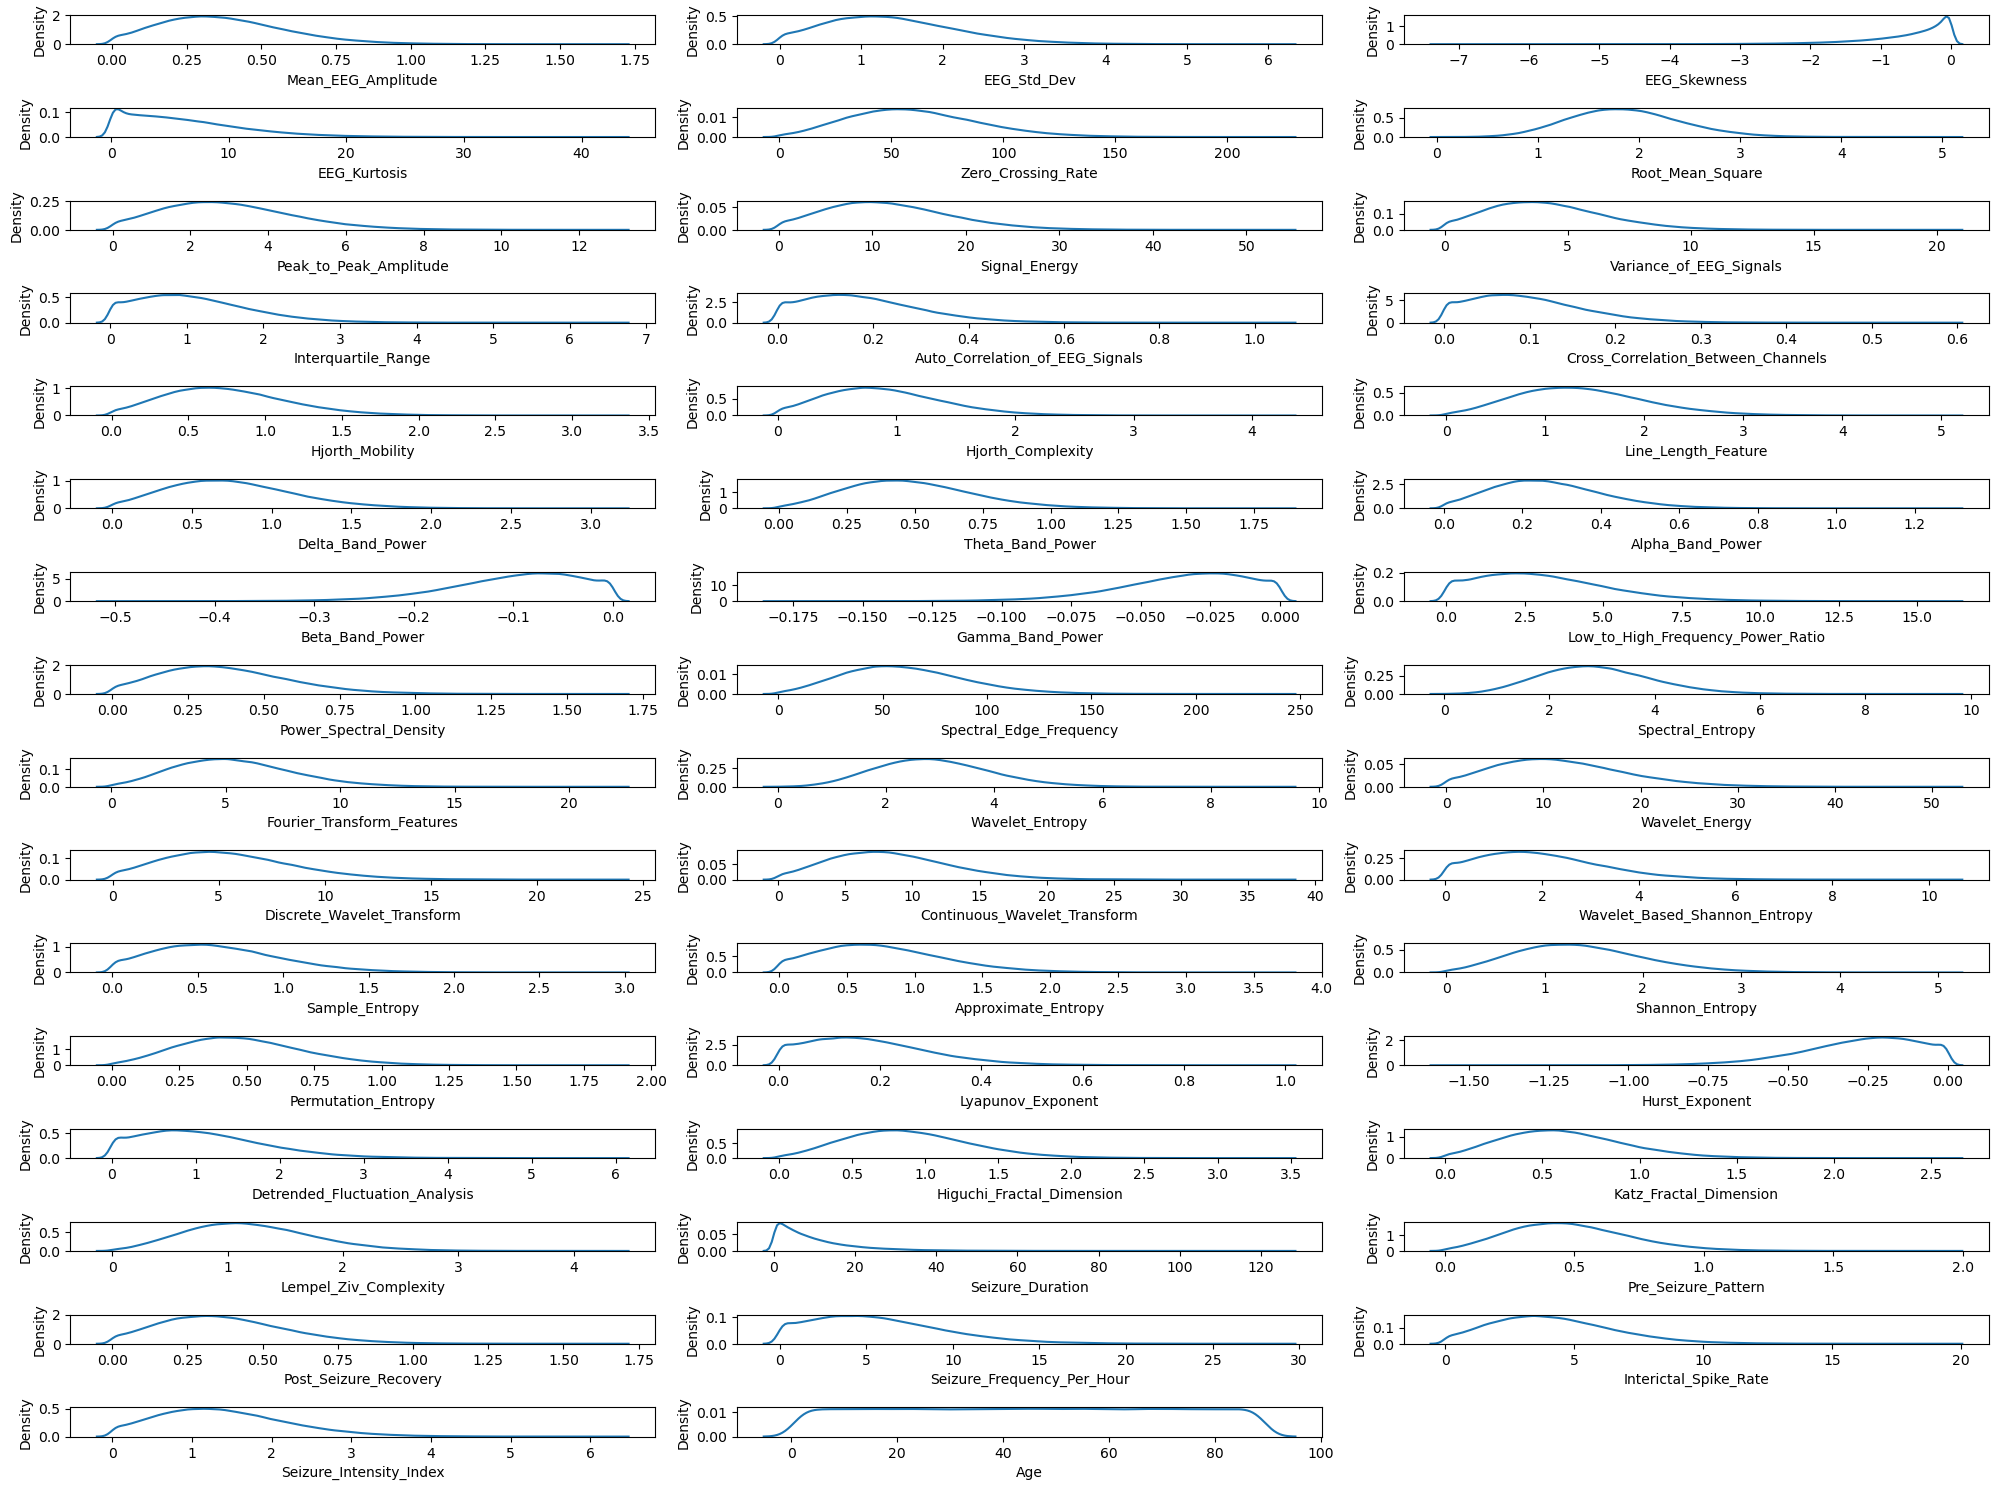

In [26]:
plt.figure(figsize=(20,15))
t=1
for i in num:
    plt.subplot(16,3,t)
    sns.kdeplot(df[i])
    t+=1

plt.tight_layout()
plt.show()

There are skewness

In [28]:
# Calculate skewness & kurtosis for all numeric columns

# from scipy.stats import skew, kurtosis

# skew_kurt_data = []
# for i in num:
#     skewness = skew(df[num].dropna()) 
#     kurt = kurtosis(df[num].dropna())

#     skew_kurt_data.append([col, skewness, kurt])

# skew_kurt_df = pd.DataFrame(skew_kurt_data, columns=['Feature', 'Skewness', 'Kurtosis'])
# print(skew_kurt_df)

# plt.figure(figsize=(15, 8))
# for i, col in enumerate(num[:6]):  
#     plt.subplot(16, 3, i + 1)
#     sns.histplot(df[num], kde=True, bins=30)
#     plt.title(f'Histogram of {num}')
#     plt.xlabel(num)

# plt.tight_layout()
# plt.show()

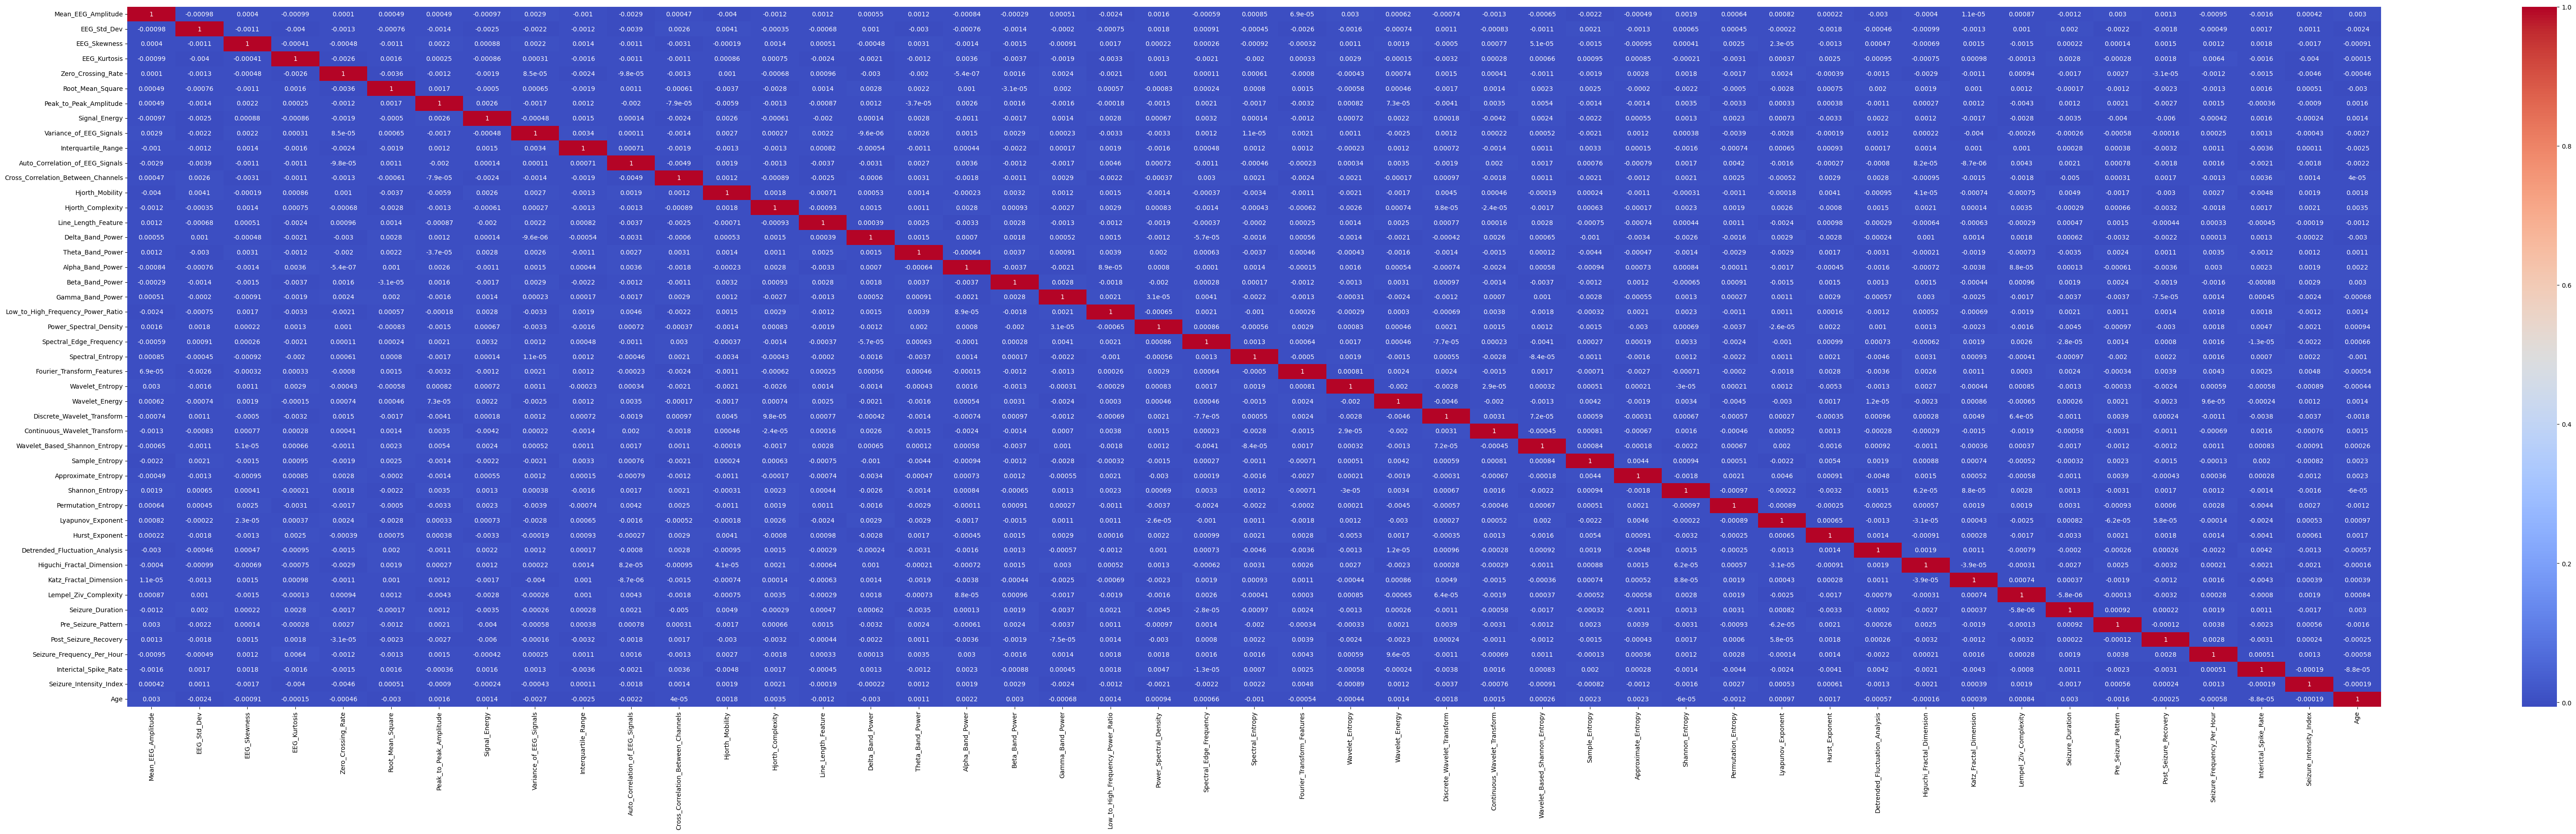

In [29]:
plt.figure(figsize = (80, 20))
sns.heatmap(df[num].corr(),annot=True,cmap= 'coolwarm') #colors= viridis, rainbow, plasma
plt.show()

Seems like all of the variables are either weakly correlated or not correlated

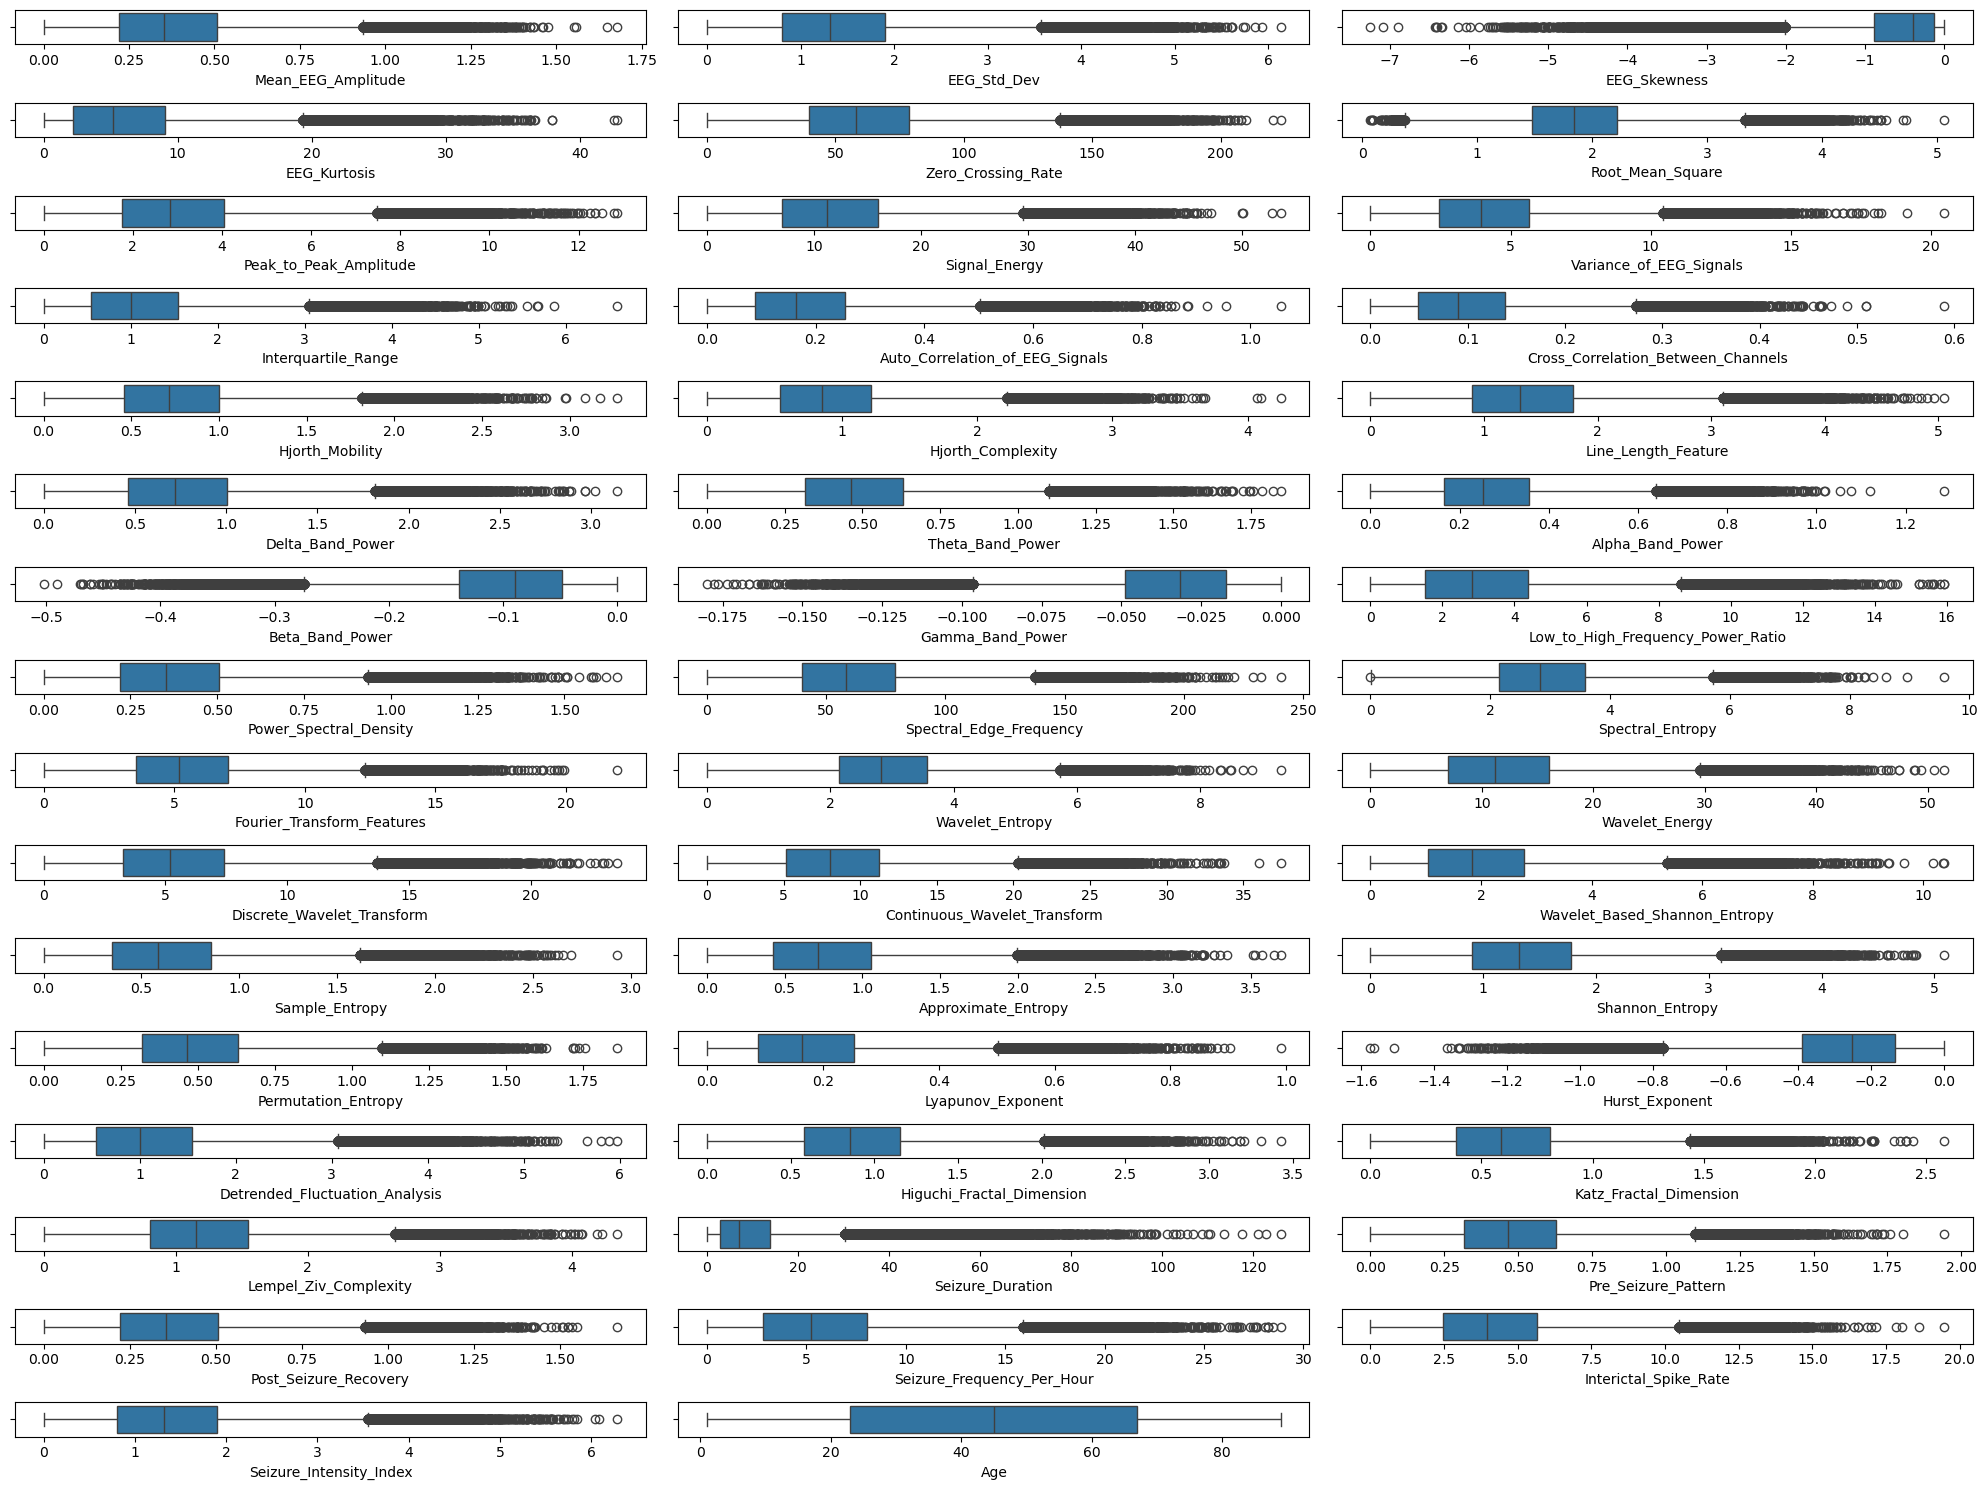

In [31]:
plt.figure(figsize=(20,15))
t=1
for i in num:
    plt.subplot(16,3,t)
    sns.boxplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

Except Age all of the columns have outliers

###### Categoric variables

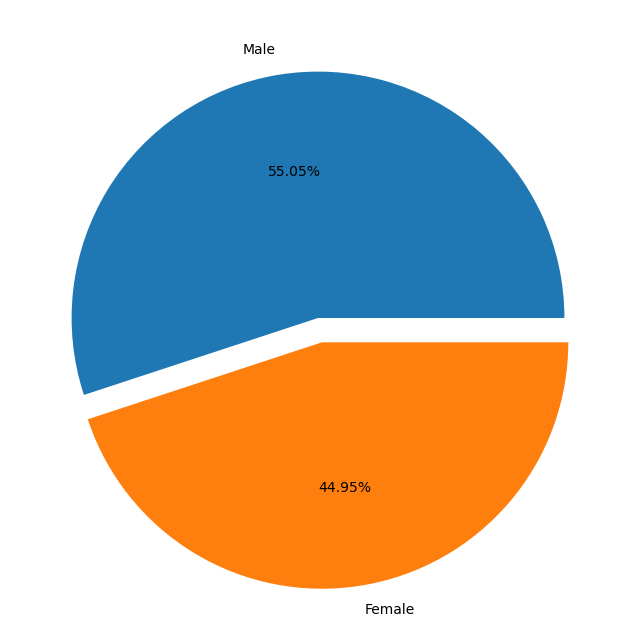

In [34]:
plt.figure(figsize=(15,8))
plt.pie(x = df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, autopct = '%.2f%%', explode = [0,0.1])
plt.show()

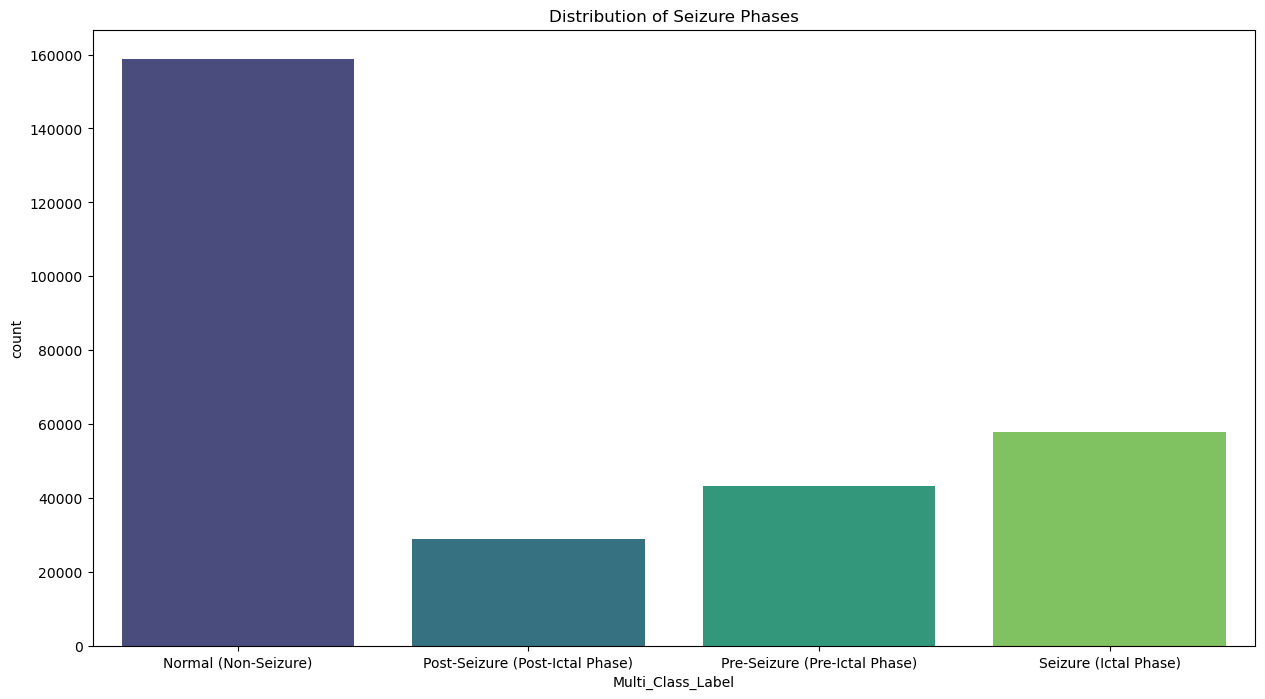

In [35]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Multi_Class_Label'], data=df, palette='viridis')
plt.title("Distribution of Seizure Phases")
plt.show()

In [36]:
# Count of records in each class for Multi-Class Seizure Phase
print(df['Multi_Class_Label'].value_counts())

print('\n\n')

# Count of records in each class for Seizure Type
print(df['Seizure_Type_Label'].value_counts())


Multi_Class_Label
Normal (Non-Seizure)               158835
Seizure (Ictal Phase)               57905
Pre-Seizure (Pre-Ictal Phase)       43336
Post-Seizure (Post-Ictal Phase)     28934
Name: count, dtype: int64



Seizure_Type_Label
Normal                 173035
Generalized Seizure     72474
Focal Seizure           43501
Name: count, dtype: int64


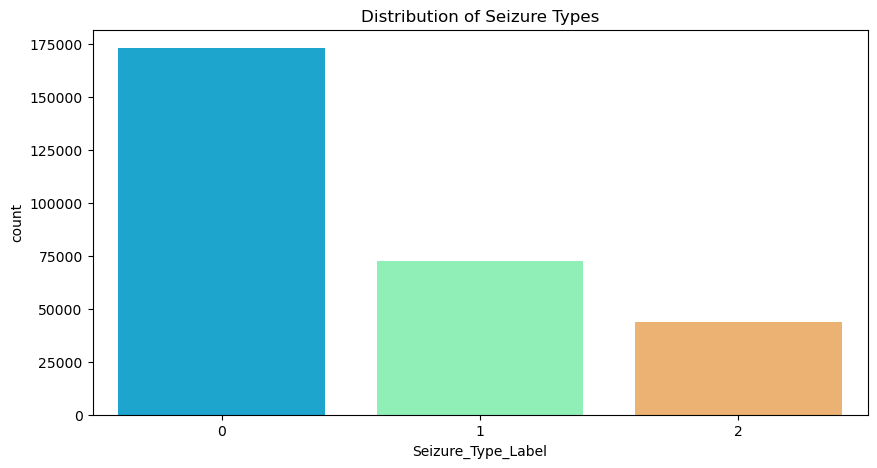

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Seizure_Type_Label'], data=df, palette='rainbow')
plt.title("Distribution of Seizure Types")
plt.show()

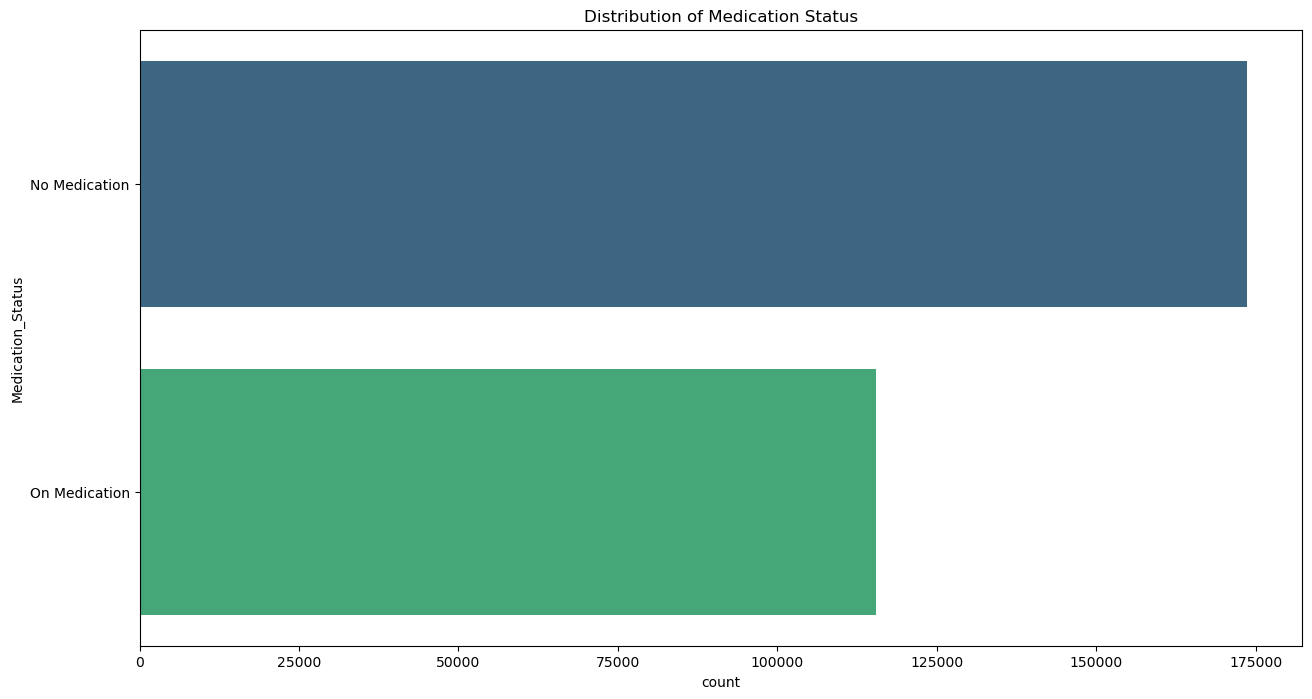

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df['Medication_Status'], data=df, palette='viridis')
plt.title("Distribution of Medication Status")
plt.show()

In [39]:
# Count of records in each class for Medication Status
print(df['Medication_Status'].value_counts())

Medication_Status
No Medication    173590
On Medication    115420
Name: count, dtype: int64


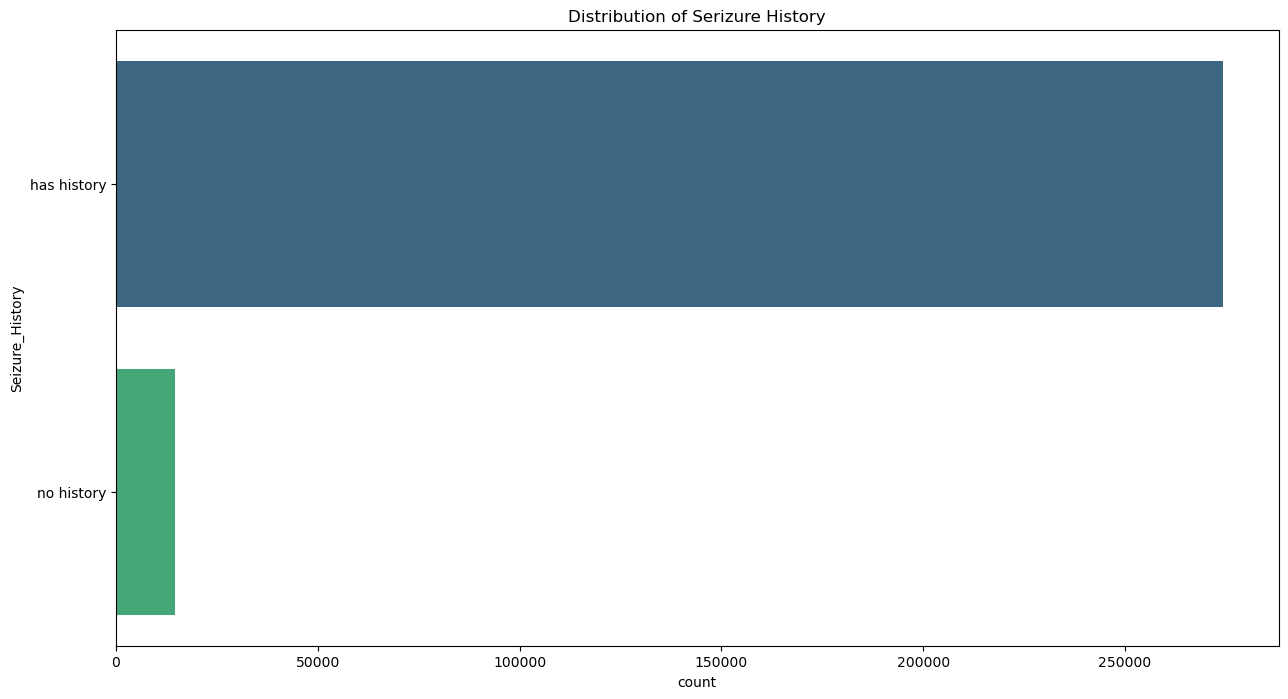

In [40]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df['Seizure_History'], data=df, palette='viridis')
plt.title("Distribution of Serizure History")
plt.show()

In [41]:
# Count of records in each class for Medication Status
print(df['Seizure_History'].value_counts())

Seizure_History
has history    274349
no history      14661
Name: count, dtype: int64
